113617.27024144215 1.0


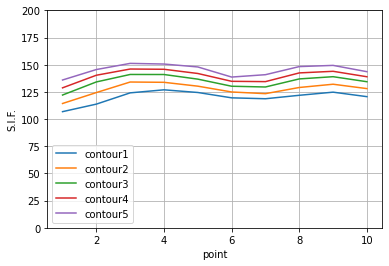

In [125]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fracture

read = pd.read_excel('data\distance_angle\input_distance.xlsx')
read2 = pd.read_csv('data/distance_angle/data.csv', encoding = 'ISO-8859-1')
im =np.array(cv2.imread('data/distance_angle/ff000057.jpg', cv2.IMREAD_GRAYSCALE ))/255
crack_tip_loaction = np.array([[207,614]])
data = np.array(read)
tension = np.array(read2)
tension_ml = tension[:,10]
tension_stress= tension[:,11]
ratio = 2/70*0.001 #70픽셀당 2mm , mm to m

distance=[]
Ml_intencity=[]
stress = []
K= []


for i in data:
    theta=i[4]
    calculater_location = np.array([[i[2],i[3]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[2]):int(i[2]+2),int(i[3]):int(i[3])+2])
    idx = (np.abs(tension_ml-value)).argmin()
    stress_value = tension_stress[idx]
    stress = np.append(stress,stress_value)
    Ml_intencity = np.append(Ml_intencity, value)
    k = fracture.K_deviator(stress_value, distance_value,theta*np.pi/180)
    K= np.append(K,k)

#graph part
fig, ax1 = plt.subplots()
line1 = ax1.plot(data[0:10,1],K[0:10], label="contour1")
line2 = ax1.plot(data[10:20,1],K[10:20], label="contour2")
line3 = ax1.plot(data[20:30,1],K[20:30], label="contour3")
line4 = ax1.plot(data[30:40,1],K[30:40], label="contour4")
line5 = ax1.plot(data[40:50,1],K[40:50], label="contour5")
lines = line1 + line2 + line3 + line4 + line5
labels = [l.get_label() for l in lines]
plt.grid()
plt.legend(lines, labels, loc=0)
plt.ylim(0,200)
plt.xlabel('point')
plt.ylabel('S.I.F.')
plt.savefig('data/distance_angle/k그래프.png')
plt.show()

data_union = {'Contour N.o.': data[:,0], 'point': data[:,1],
              'location_y': data[:,2], 'location_x': data[:,3],
              'theta': data[:,4], 'distance':distance,
              'ml_intencity':Ml_intencity, 'Stress':stress, 'K':K}
df = pd.DataFrame(data_union)
df.to_excel('data\distance_angle\output_distance.xlsx')



In [126]:
#최소자승법
import cv2
import numpy as np


a = np.linspace(0,2000,2001, dtype=int)*0.1
l_s_m = []
for i in a:
    x = np.sum(np.power((K[40:50]-i),2))

    l_s_m = np.append(l_s_m,x)

l_s_m_index = l_s_m.argmin()
print(a[l_s_m_index])

145.20000000000002


In [127]:
import cv2
import numpy as np
import pandas as pd


def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append([x,y])
        print("마우스 이벤트발생, x:", x, "y", y)


img = np.zeros((100,50))+0.5

cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

points = []
x=[]
y=[]
number = []
num=9

while(True):

    cv2.imshow('image', img)

    k=cv2.waitKey(1)&0xFF
    if k == 27:
        for i in points:
            num += 1
            number = np.append(number, num)
            x = np.append(x, i[0])
            y = np.append(y, i[1])


        break


data_union = {'Contour N.o.': number, 'x': x, 'y' :y}
df = pd.DataFrame(data_union)
df.to_excel('연습용.xlsx')
cv2.destroyAllWindows()

마우스 이벤트발생, x: 46 y 26


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/ghrms/Desktop/실험영상/3점굽힘/Specimen_RawData_1.csv')
a = np.array(df['(kgf)'])*-1
df['(kgf)']= a

b = np.array(df['(mm)'])*-1
df['(mm)']= b
df.plot('(mm)','(kgf)', legend=None, c = 'black')
plt.ylabel('kgf')
plt.xlabel('mm')
plt.grid()
plt.savefig('bending test.png', dpi = 300)

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob
from scipy.spatial.distance import cdist


path = './data/distance_angle/'
img = glob.glob(path+'/ff*.jpg')
if img is None:
    print("Image read false!")
    sys.exit()
print(img)
src = cv2.imread(img[0], cv2.IMREAD_GRAYSCALE)/255
src1 = cv2.imread(img[1], cv2.IMREAD_GRAYSCALE)/255


dst = cv2.absdiff(src,src1)*255
_, x = np.shape(dst)


cv2.imshow('src', src)
cv2.imshow('src1', src1)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

x = dst[600,:]
y = dst[:,1000]
plt.plot(np.arange(1920),x)
plt.show()
plt.plot(np.arange(np.shape(y)[0]),y)
plt.show()

gas = cv2.GaussianBlur(dst,(0,0), 20)
np.max(gas)

fig, ax = plt.subplots()
ax.imshow(src1,cmap='gray')
cs = ax.contour(gas, [k for k in range(2,15)],  colors='black', linewidths = 0.5)

In [ ]:
dat = cs.allsegs
dat

In [ ]:
num_levels = len(cs.allsegs)
num_element = len(cs.allsegs[0])  # in level 0
num_vertices = len(cs.allsegs[0][0])  # of element 0, in level 0
num_coord = len(cs.allsegs[0][0][0])

print(num_levels, num_element, num_vertices, num_coord)

contour= dat[0][0]

scatter_X = cs.allsegs[1][0][:,0].flatten()
scatter_y = cs.allsegs[1][0][:,1].flatten()
#ax.scatter(scatter_X,scatter_y, linewidths=0.1)

# distance = cdist(max_point, cs.allsegs[1][0][0])

#plt.savefig('./contour.png', dpi=300)

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob
from scipy.spatial.distance import cdist

path = 'G:\experiment data/film/20200916\img2'
img = glob.glob(path+'/ff*.jpg')
if not img:
    print("Image read false!")
    sys.exit()

src = cv2.imread(img[0], cv2.IMREAD_GRAYSCALE)/255
src1 = cv2.imread(img[601], cv2.IMREAD_GRAYSCALE)/255
dst = cv2.absdiff(src,src1)*255



fig, ax = plt.subplots(3,3, figsize=(15,10))
for i in range(0,3):
    for j in range(0,3):
        gas_sigma = i*30+j*10+1
        gas = cv2.GaussianBlur(dst,(0,0), gas_sigma)
        ax[i][j].imshow(src1,cmap='gray')
        cs = ax[i][j].contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
        ax[i][j].set_title(str(gas_sigma)+'gas sigma, level max'+str(int(np.max(gas))))
# num_levels = len(cs.allsegs)
# num_element = len(cs.allsegs[0])  # in level 0
# num_vertices = len(cs.allsegs[0][0])  # of element 0, in level 0
# num_coord = len(cs.allsegs[0][0][0])
#
# print(num_levels, num_element, num_vertices, num_coord)
#
# contour= cs.allsegs[0][0] #맨앞이 레벨별 엘리먼트는 0주고 컨투어빼기
#
# scatter_X = cs.allsegs[1][0][:,0].flatten()
# scatter_y = cs.allsegs[1][0][:,1].flatten()
# #ax.scatter(scatter_X,scatter_y, linewidths=0.1)

# distance = cdist(max_point, cs.allsegs[1][0][0])

plt.savefig('./contour.png')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import find_peaks
import glob

path = 'G:\experiment data/a/'
save_path = 'G:\experiment data/a/'

file_list = os.listdir(path)

for file_name in file_list:
    print(file_name, "시작!")
    df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
    data = np.array(df)

    y = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7']#, 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15'] #라인 갯수

    load = data[:, 8:9]
    dis = data[:, 9:10]

    for i in range(0,8):
        y[i] = data[:, i:i+1]

    num = np.shape(data)[0]
    x = np.arange(num)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    for i in range(0, 8):
        ax1.plot(x, y[i], label=i + 1, linewidth=0.1)

    # block = dis.flatten() * -1   #displacement 로 피크 잡을시 dis변수사용  load사용하고 싶을시 load변수변경
    # peaks, _ = find_peaks(block, distance=60000)
    #
    # for i in peaks[0:len(peaks) - 1]:
    #     print(i)
    #     plt.axvspan(i - 15000, i + 15000, alpha=0.1, color='gray')
    #
    ax2.plot(x, load)
    ax2.plot(x, dis)
    ax1.set_ylabel('Sample Voltage')
    ax2.set_ylabel('Load - Displacement')
    ax1.set_xlabel('Time')
    ax1.set_ylim(4, 6)
    ax2.set_ylim(-10, 0)
    ax1.set_ylim()
    # ax1.set_xlim(-100000,1400000)

    plt.savefig(save_path + '/' + file_name + '.png', dpi=300)
    print(file_name, "완료!")
    plt.close(fig)

print('최종 끝')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import find_peaks
import sys

##################################################
path = 'G:\experiment data/a/'
save_path = 'G:\experiment data/b/'
rate = 500 #받는속도
range_front =  100 # 피크 앞뒤로 짜를 갯수
range_back = 100#
term = 10 #중간에 몇초쉬었는지
##################################################

file_list = os.listdir(path)
count = 1
if not file_list:
    print('경로확인')
    sys.exit()

for file_name in file_list:

    print(file_name, "시작!")
    df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
    data = np.array(df)

    load = data[:, 8:9]
    dis = data[:, 9:10]
    x = np.arange(np.shape(load)[0])
    block = dis.flatten() * -1   #displacement 로 피크 잡을시 dis변수사용  load사용하고 싶을시 load변수변경
    peaks, _ = find_peaks(block, distance= term*rate) #peak 받아냄
    peaks = np.delete(peaks,-1) #거리로하다보면 마지막 요소 생기는데 이거 삭제

    for i in peaks[0:len(peaks)]: # 첫번째 그래프빼고싶으면 1:len~~
        plt.axvspan(i - range_front, i + range_back, alpha=0.1, color='green')
        result = data[i-range_front:i+range_back+1 ,:]
        np.savetxt(save_path+file_name.split('.')[0]+'_'+str(count)+'.'+file_name.split('.')[1], result, delimiter='\t', fmt='%4e')
        count += 1
    plt.plot(block*-1,c = 'black', linewidth=0.5)
    plt.plot(peaks, block[peaks]*-1, "x", c='red')
    plt.savefig(save_path+file_name.split('.')[0]+'check.png', dpi=300)
print('끄으으으으으으으읕')

In [130]:
rainbow=["빨","주","노","초","파","남","보"]
for i in range(len(rainbow)):
	color = rainbow[i]
	print('{}번째 색은 {}'.format(i+1,color))

TypeError: 'int' object is not callable

In [1]:
import fracture

A1 = fracture.CTS(1.9708, 3,15.348, 0.3)
A1.k1()

113617.27024144215 1.0


123.35634679668178

0.0

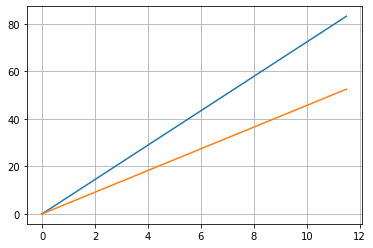

In [15]:
import fracture
import matplotlib.pyplot as plt
import numpy as np

force_l = np.arange(0,11.6,0.1)
k1=[]
k2=[]
for force in force_l:
    k1.append(fracture.CTS(1.875, 3 , force, 0.3).k1())
    k2.append(fracture.CTS(1.875, 3 , force, 0.3).k2())
plt.grid()
plt.plot(force_l,k1)
plt.plot(force_l,k2)


